# Table of content

0. [Introduction](#section-zero)
1. [Import Data](#section-one)
2. [EDA](#section-two)
3. [Model Testing](#section-three)
4. [Feature Engineering](#section-four)
5. [Hyperparameters tuning](#section-five)
6. [Conclusion and Submission](#section-six)

<a id="section-zero"></a>
# 0. Introduction

## A. Problem Scope
The goal is to predict if an interstellar passenger will be transported to another dimension or not. The data are given by Kaggle

## B. Personal Goal
Though that project is pretty obvious, I would like to give it a try. 
I'm looking to achieve an accuracy around 0.80.

<a id="section-one"></a>
# 1. Import Libraries and Data

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
0
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# load data to df
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set()
# make sure we can see needed columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

<a id='section-two'></a>
## 2. EDA

In [5]:
# check shape and head
print('train set shape:', df_train.shape)
print('test set shape:', df_test.shape)
df_train.head()

train set shape: (8693, 14)
test set shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Dataset Description

train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.<br>
* `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.<br>
* `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.<br>
* `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.<br>
* `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>
* `Destination` - The planet the passenger will be debarking to.<br>
* `Age` - The age of the passenger.<br>
* `VIP` - Whether the passenger has paid for special VIP service during the voyage.<br>
* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>
* `Name` - The first and last names of the passenger.<br>
* `Transported` - Whether the passenger was transported to another dimension. **This is the target, the column we are trying to predict.**

## Data Types

In [7]:
from ydata_profiling import ProfileReport

# Generate the report
profile = ProfileReport(df_train,title="Space Titanic Profile")
# Save the report to .html
profile.to_file("df_train_report.html")

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


**Duplicates and Missing Values**

In [9]:
# Duplicates
print(f'Duplicates for train set: {df_train.duplicated().sum()}')
print(f'Duplicates for test set: {df_test.duplicated().sum()}\n')

# Missing Values
print(f'Missing Values for train set: {df_train.isna().sum()}')
print(f'Missing Values for test set: {df_test.isna().sum()}')


Duplicates for train set: 0
Duplicates for test set: 0

Missing Values for train set: PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Missing Values for test set: PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


There are no duplicates. There are NA for every columns and for both datasets. I will deal with NA after the EDA.

In [6]:
passengers = df_train.copy()
features = passengers.columns.tolist()
target = passengers[features.pop()]

feat_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
feat_cat = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

## Transported depending on numerical features
* Childs (0-10) are more likely to be transported and older people (60+) are less likely. I created categories but it didnt give any results (in fact, it was worse, so I kept ages as integer)
* There are a lot of outliers that makes it difficult to show relevant results. I will remove outliers to look further.

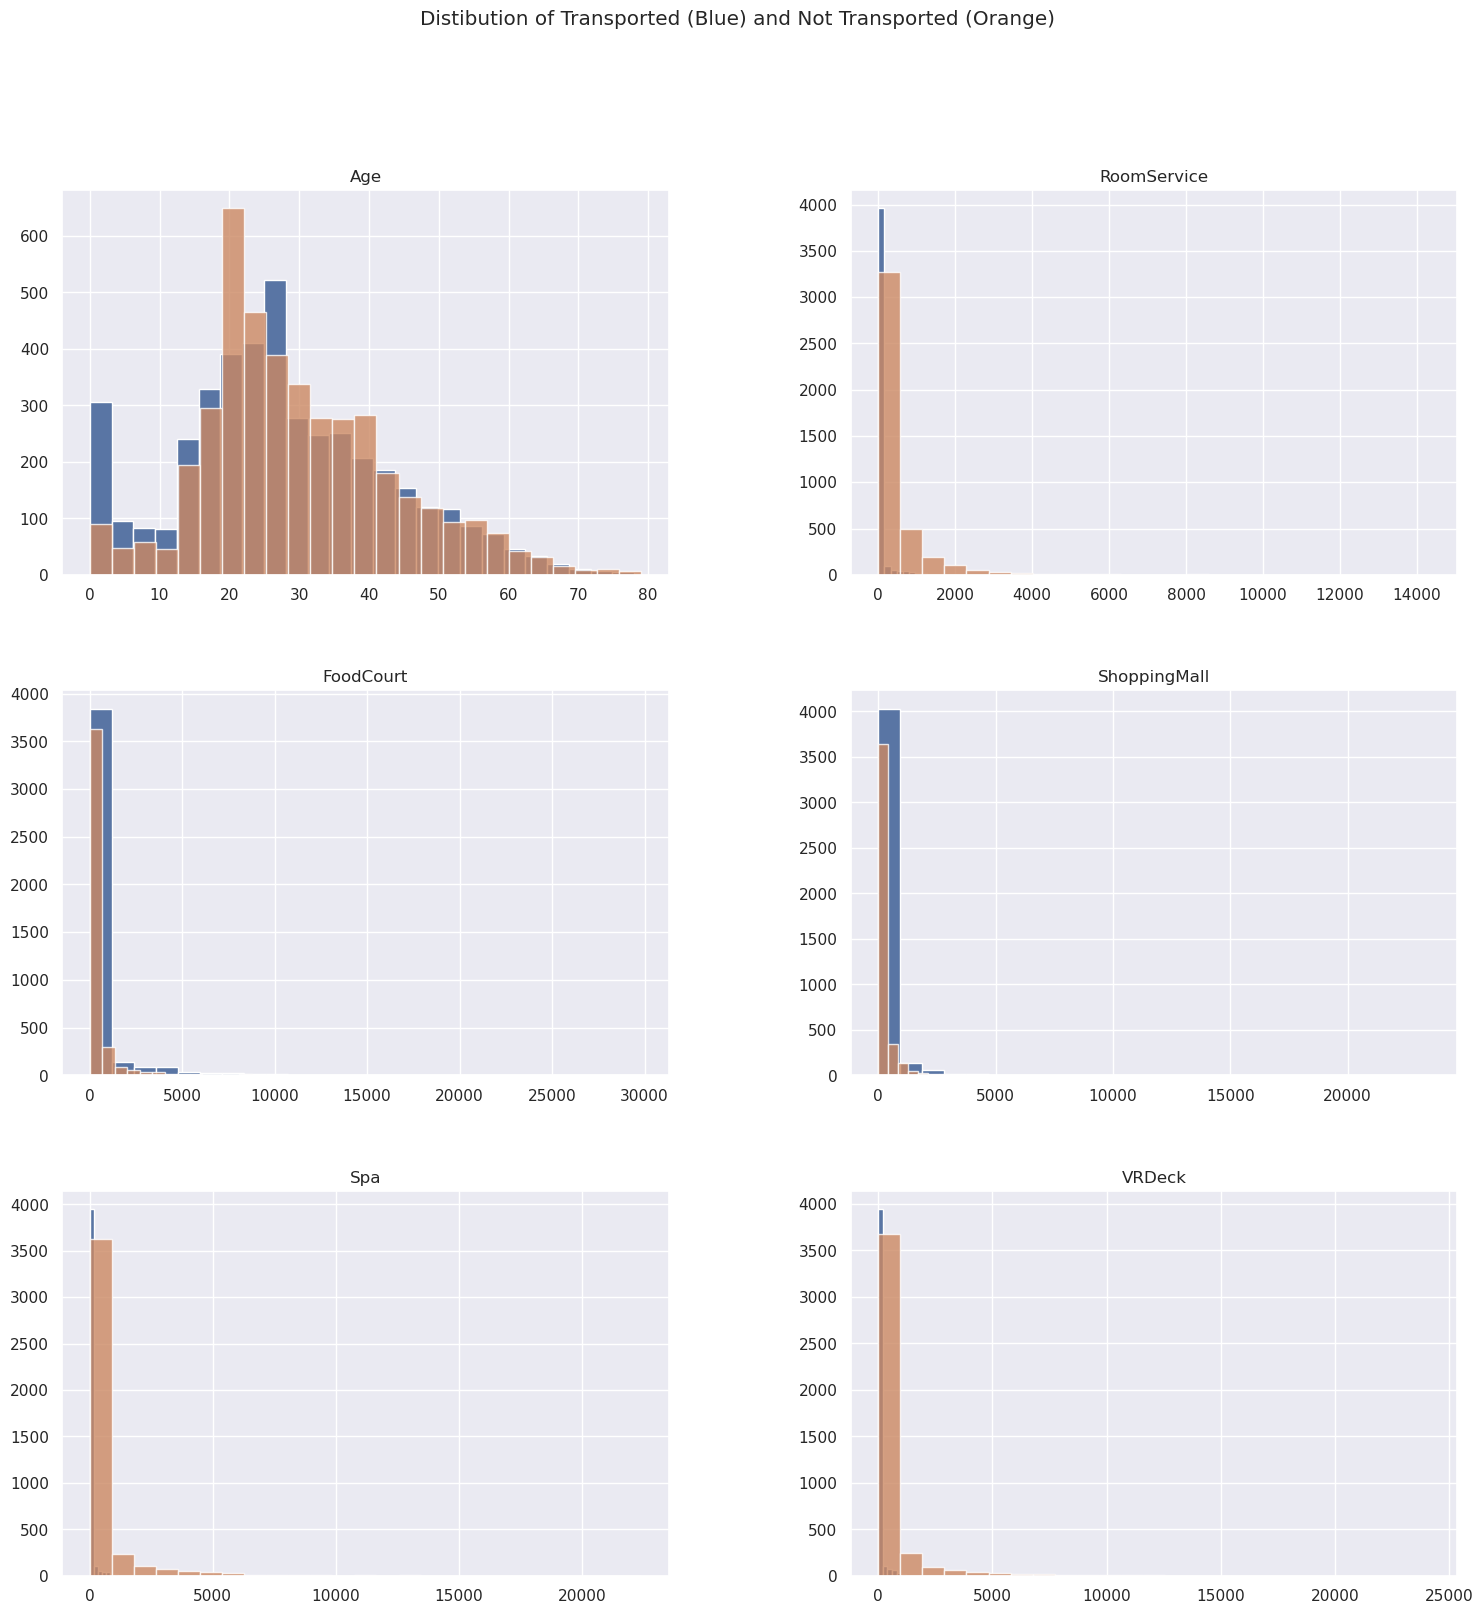

In [18]:
_, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,18))
plt.suptitle('Distibution of Transported (Blue) and Not Transported (Orange)')
passengers.loc[passengers['Transported'] == True].hist(bins = 25, figsize = (12, 12), ax=axes, label='Transported', color='#5975a4')
passengers.loc[passengers['Transported'] == False].hist(bins = 25, figsize = (12, 12), ax=axes, alpha=0.8, label='Not Transported', color='#cc8963')
plt.show()

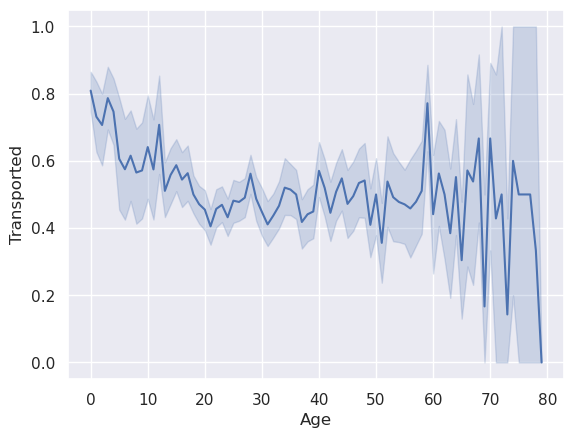

In [19]:
sns.lineplot(data=df_train,
              x='Age',
              y='Transported')
plt.show()

### Remove Outliers


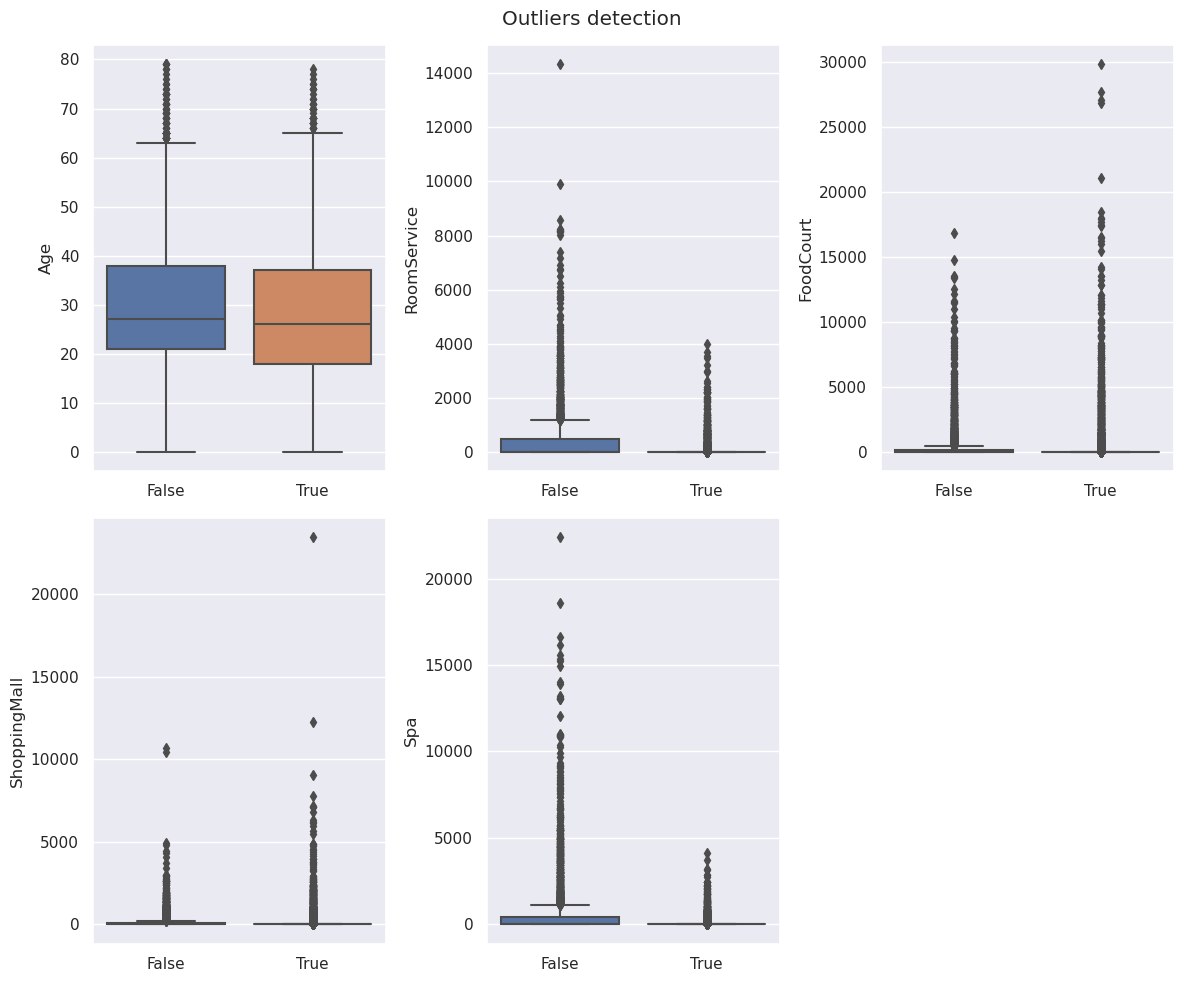

In [20]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,10))
plt.suptitle('Outliers detection')
for feat, ax in zip(feat_num, axes.ravel()):
    sns.boxplot(data=passengers, x='Transported', y=feat, ax=ax)
    ax.set_xlabel('')
axes[-1,-1].set_visible(False)
plt.tight_layout()

In [30]:
def remove_outliers(X, y, iqr_range=1.5):
    """
    Remove the outliers from a DataFrame X and the equivalent indexes from a DataFrame y.
    
    Args:
        X (dataframe): The dataframe to remove outliers from
        y (dataframe): The dataframe used for training the model and in which rows indexes of X are removed
        iqr_range (int): The range to consider values as outliers. Default is 1.5 times the IQR.
        
    Returns:
        X_o, y_o: The dataframes without the outliers
    """
    Q1 = np.percentile(X, 25, axis=0)
    Q3 = np.percentile(X, 75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_range * IQR
    upper_bound = Q3 + iqr_range * IQR
    outlier_mask = np.logical_or(X < lower_bound, X > upper_bound).any(axis=1)
    X_o = X[~outlier_mask]
    y_o = y[~outlier_mask]
    return X_o, y_o

passengers_out, target_out = remove_outliers(passengers[feat_num], target)

ValueError: Could not interpret input 'Transported'

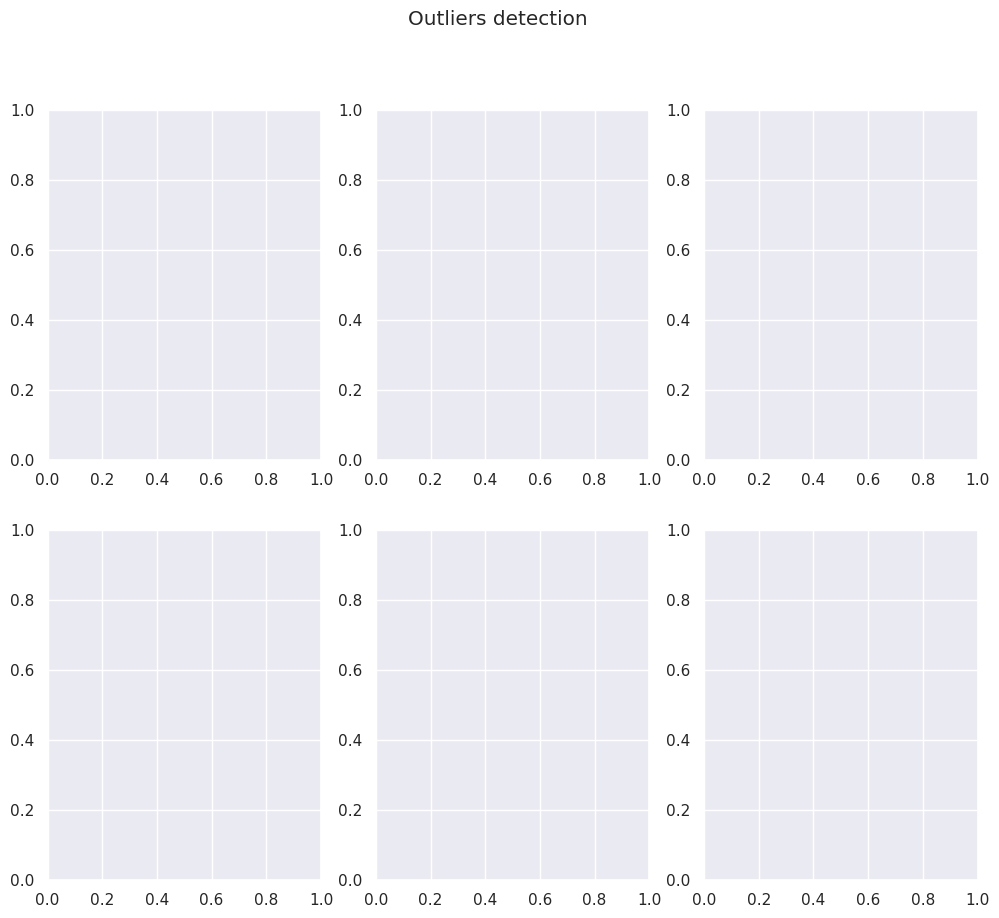

In [31]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,10))
plt.suptitle('Outliers detection')
for feat, ax in zip(feat_num, axes.ravel()):
    sns.boxplot(data=passengers_out, x='Transported', y=feat, ax=ax)
    ax.set_xlabel('')
axes[-1,-1].set_visible(False)
plt.tight_layout()

## Transported depending on Origin, Destination, CryoSleep and VIP
* The ratio of Transported passenger is way lower for Earth than for Mars and particularly Europa
* It is worse to go to Trappist than to PSO or 55 Cancri
* Passenger in CryoSleep mode are transported to 82%, while the other are to 32%
* 62% of VIPs are transported against 

<Axes: xlabel='VIP', ylabel='count'>

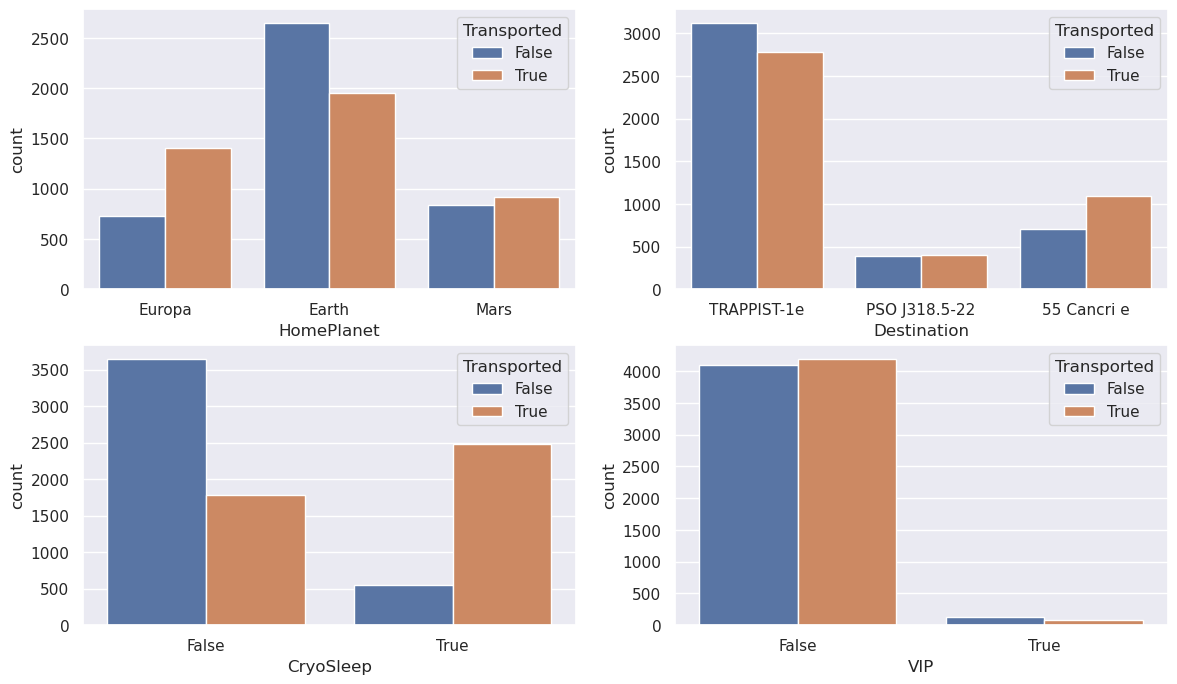

In [22]:
# define plotting region (2 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

# create one countplot for each subplot

sns.countplot(data=passengers, x='HomePlanet', hue='Transported', dodge=True, ax=axes[0,0])
sns.countplot(data=passengers, x='Destination', hue='Transported', dodge=True, ax=axes[0,1])
sns.countplot(data=passengers, x='CryoSleep', hue='Transported', dodge=True, ax=axes[1,0])
sns.countplot(data=passengers, x='VIP', hue='Transported', ax=axes[1,1])

**New feature : Alone or not**<br>
Using the cabin numbers, I calculate how many people are in the cabin and set 'IsAlone' to 1 if there is only 1 person.
The feature seems interesting as the ratio of transported is much bigger for non solo person.

<Axes: xlabel='IsAlone', ylabel='count'>

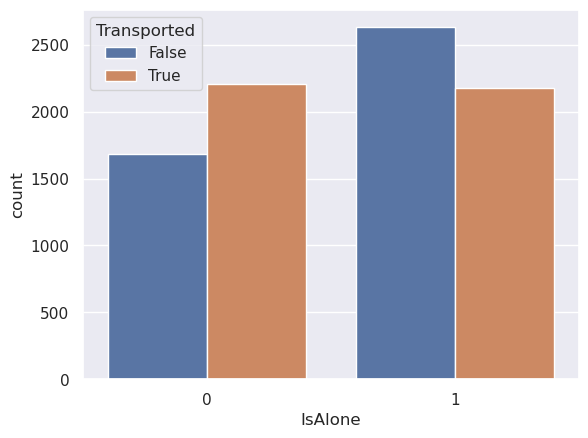

In [25]:
# Extract 'CabinGroup' using vectorized string operations
passengers['CabinGroup'] = passengers['PassengerId'].str.split('_').str[0]
df_test['CabinGroup'] = df_test['PassengerId'].str.split('_').str[0]

# Count occurrences of 'CabinGroup' and create 'IsAlone' column
group_counts = passengers['CabinGroup'].value_counts()
passengers['IsAlone'] = passengers['CabinGroup'].map(lambda x: 1 if group_counts.get(x, 0) == 1 else 0)

group_counts = df_test['CabinGroup'].value_counts()
df_test['IsAlone'] = df_test['CabinGroup'].map(lambda x: 1 if group_counts.get(x, 0) == 1 else 0)
sns.countplot(data=passengers, x='IsAlone', hue='Transported', dodge=True)

## correlation

<Axes: >

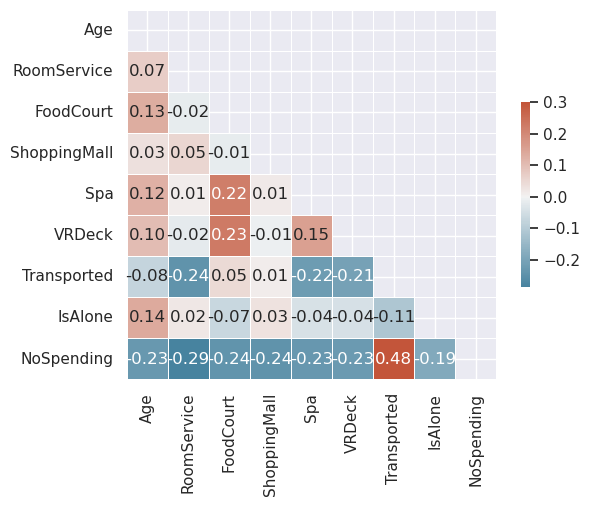

In [53]:
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

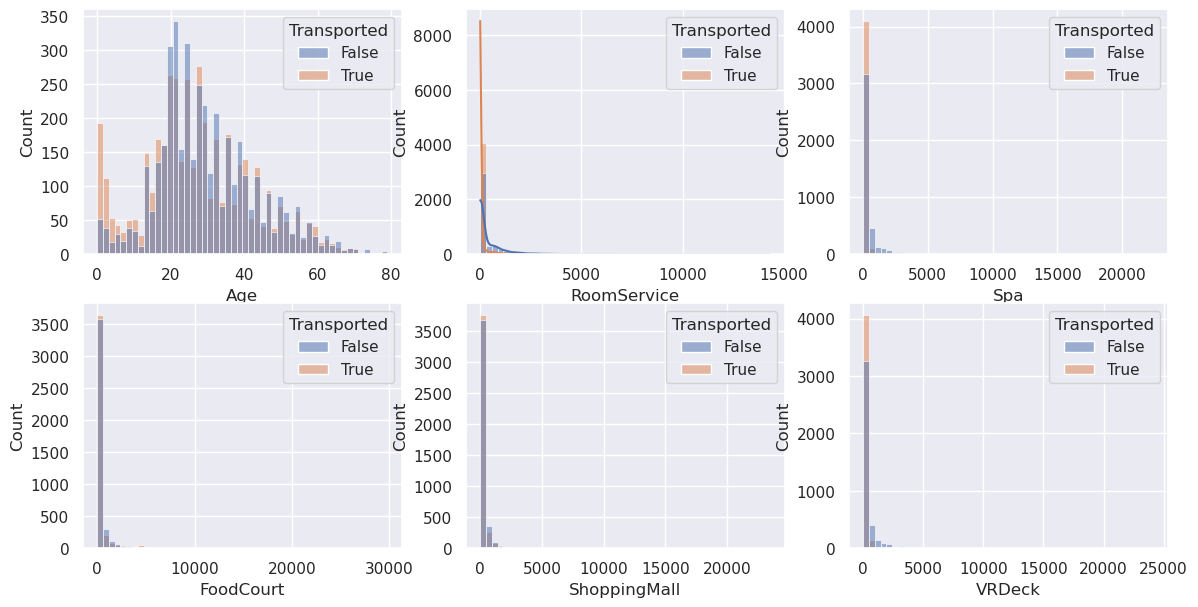

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,7))
sns.histplot(data=df_train, x='Age', hue='Transported', bins=50, ax=axes[0,0])
sns.histplot(data=df_train, x='RoomService', hue='Transported', kde=True, bins=50, ax=axes[0,1])
sns.histplot(data=df_train, x='Spa', bins=50, hue='Transported', ax=axes[0,2])
sns.histplot(data=df_train, x='FoodCourt', hue='Transported', bins=50, ax=axes[1,0])
sns.histplot(data=df_train, x='ShoppingMall', hue='Transported', bins=50, ax=axes[1,1])
sns.histplot(data=df_train, x='VRDeck', hue='Transported', bins=50, ax=axes[1,2]);

So it is not obvious, people that are spending a very low amount seems to be more transported.
I can create a category of people not spending any money (or spending less that a certain amount (10% of the median for example).
Because the correlation with the spending feature seems low, I might create a column mixing the spendings over the five columns.

In [21]:
df_train['NoSpending'] = df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',]].apply(lambda row: 1 if row.sum() == 0 else 0, axis=1)
df_test['NoSpending'] = df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',]].apply(lambda row: 1 if row.sum() == 0 else 0, axis=1)

**Countplot**<br>
I could remove outliers but I'll keep them for the time being

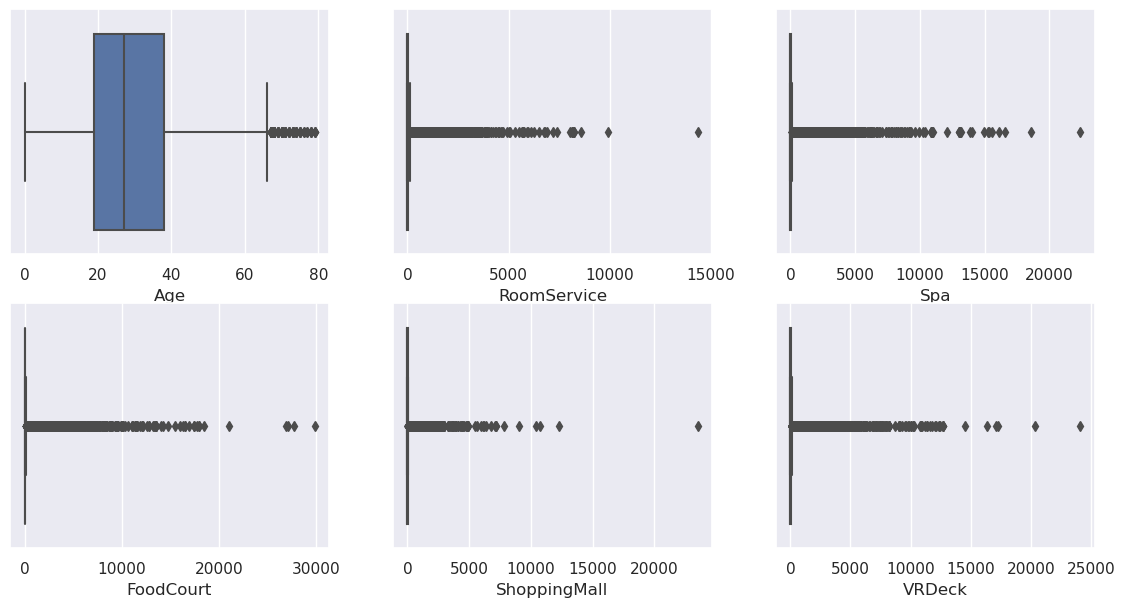

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,7))
sns.boxplot(data=df_train, x='Age', ax=axes[0,0])
sns.boxplot(data=df_train, x='RoomService', ax=axes[0,1])
sns.boxplot(data=df_train, x='Spa', ax=axes[0,2])
sns.boxplot(data=df_train, x='FoodCourt', ax=axes[1,0])
sns.boxplot(data=df_train, x='ShoppingMall', ax=axes[1,1])
sns.boxplot(data=df_train, x='VRDeck', ax=axes[1,2]);

<a id="section-three"></a>
# 3. Model Testing

## a. Features Selection

`PassengerId`, `Cabin` and `Name` seems useless so I will remove them<br>

I will apply LabelEncoder on `HomePlanet`, `Destination`, `CryoSleep`, `VIP`<br>

I will normalize the other features

In [22]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,NoSpending,IsAlone
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,1
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,0,1


In [25]:
# classify the features and target
feat_cat = ['HomePlanet', 'CryoSleep', 'Destination','VIP']
feat_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'NoSpending', 'IsAlone']
feat_num_cont = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
feat_drop = ['PassengerId', 'Cabin', 'Name', 'CabinGroup']
target = 'Transported'

# build features (X) and target(y)
X_train = df_train.drop(columns=(feat_drop))
X_train = X_train.drop(columns=(target))
y_train = df_train[target]
X_test = df_test.drop(columns=feat_drop)

# Impute NAs for the age and VIP
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
X_train[feat_num] = si.fit_transform(X_train[feat_num])
X_test[feat_num] = si.transform(X_test[feat_num])

# log of skewed distribution
for feat in feat_num:
    X_train[feat]=np.log(1+X_train[feat])
    X_test[feat]=np.log(1+X_test[feat])
    
# Label encoding the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in feat_cat:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
# Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in feat_num_cont:
    X_train[col] = sc.fit_transform(X_train[[col]])
    X_test[col] = sc.transform(X_test[[col]])  

y_train = y_train.map({True:1, False:0})

In [44]:
# from sklearn.feature_selection import VarianceThreshold
# sel = VarianceThreshold(threshold=(.86 * (1 - .86)))
# X_train2 = sel.fit_transform(X_train2)

# X_train2 = pd.DataFrame(X_train2)
# X_train2.shape

(6954, 9)

## b. Model training
I will try quite a lot of model and then I will finetune the most promising

<a id="section-three-a"></a>
# 3a. Lazy Predict Insights

In [28]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

lc = LazyClassifier()
models, predictions = lc.fit(X_train2, X_test2, y_train2, y_test2)
print(models)

ModuleNotFoundError: No module named 'lazypredict'

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

def test_ml_cv(model, **kwarg):
    modeli = model(**kwarg)
    cv_results_train = cross_validate(modeli, X_train, y_train, cv=4, return_train_score=True)
    print(f"train set accuracy {cv_results_train['train_score'].round(4)}")
    print(f"mean train accuracy {cv_results_train['train_score'].mean().round(4)}")
    print(f"test set accuracy {cv_results_train['test_score'].round(4)}")
    print(f"mean test accuracy {cv_results_train['test_score'].mean().round(4)}")

    return modeli

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
test_ml_cv(LinearRegression)

train set accuracy [0.3407 0.3298 0.3343 0.3203]
mean train accuracy 0.3313
test set accuracy [0.2891 0.3298 0.29   0.3561]
mean test accuracy 0.3163


LinearRegression()

In [134]:
feat_importance = pd.DataFrame(model.coef_, index=model.feature_names_in_)
print(feat_importance.sort_values(by=[0], ascending=False))

                     0
NoSpending    0.358691
CryoSleep     0.076844
HomePlanet    0.065131
FoodCourt     0.035993
ShoppingMall  0.016985
Age           0.010615
VIP          -0.005236
IsAlone      -0.019515
Spa          -0.033170
VRDeck       -0.033473
RoomService  -0.038019
Destination  -0.039457


### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
test_ml_cv(LogisticRegression)

train set accuracy [0.7705 0.7729 0.7626 0.7676]
mean train accuracy 0.7684
test set accuracy [0.764  0.757  0.7759 0.7782]
mean test accuracy 0.7688


LogisticRegression()

In [96]:
feat_importance = pd.DataFrame(model.coef_, columns=model.feature_names_in_)
print(feat_importance.T.sort_values(by=[0], ascending=False))

                     0
CryoSleep     0.694871
HomePlanet    0.489599
FoodCourt     0.166225
ShoppingMall  0.046650
Age          -0.022285
Spa          -0.225448
VRDeck       -0.230040
Destination  -0.251527
RoomService  -0.281307


### Gradient Boosting Regression

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
test_ml_cv(GradientBoostingRegressor)

train set accuracy [0.4757 0.472  0.48   0.4602]
mean train accuracy 0.472
test set accuracy [0.4081 0.4176 0.3735 0.4638]
mean test accuracy 0.4157


GradientBoostingRegressor()

In [85]:
feat_importance = pd.DataFrame(model.feature_importances_, index=model.feature_names_in_)
print(feat_importance.sort_values(by=[0], ascending=False))

AttributeError: 'SGDRegressor' object has no attribute 'feature_importances_'

### Gradient Descent Regression

In [31]:
from sklearn.linear_model import SGDRegressor
test_ml_cv(SGDRegressor)

train set accuracy [0.3372 0.3269 0.332  0.3178]
mean train accuracy 0.3285
test set accuracy [0.2942 0.3279 0.2855 0.3565]
mean test accuracy 0.3161


SGDRegressor()

In [86]:
feat_importance = pd.DataFrame(model.coef_, index=model.feature_names_in_)
print(feat_importance.sort_values(by=[0], ascending=False))

                 0
NoSpending    0.34
CryoSleep     0.09
HomePlanet    0.06
FoodCourt     0.03
Age           0.02
ShoppingMall  0.01
VIP          -0.00
IsAlone      -0.02
Destination  -0.03
RoomService  -0.03
Spa          -0.04
VRDeck       -0.05


### Support Vector Machine

In [32]:
from sklearn.svm import SVR
test_ml_cv(SVR, kernel='poly')

train set accuracy [0.3902 0.38   0.3785 0.364 ]
mean train accuracy 0.3782
test set accuracy [0.2988 0.3238 0.3404 0.3808]
mean test accuracy 0.336


SVR(kernel='poly')

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=1, max_iter=10000, random_state=73, verbose=3)
)

model = polynomial_svm_clf.fit(X_train2, y_train2)
acc_train = model.score(X_train2, y_train2)
acc_test = model.score(X_test2, y_test2)
print(f'{model} training accuracy:',acc_train.round(4))
print(f'{model} training accuracy:', acc_test.round(4))
predictions = model.predict(X_test)

[LibLinear]...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [22]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=5, coef0=1, C=.01, verbose=3))
model=poly_kernel_svm_clf.fit(X_train2, y_train2)
acc_train = model.score(X_train2, y_train2)
acc_test = model.score(X_test2, y_test2)
print(f'{model} training accuracy:',acc_train.round(4))
print(f'{model} training accuracy:', acc_test.round(4))
predictions = model.predict(X_test)

NameError: name 'make_pipeline' is not defined

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import random
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# SVC param_distributions
param_dist = {
    'C': [0.01, 1, 10],      # Regularization parameter C
    'kernel': ['poly'],           # Kernel type (polynomial)
    'degree': [2, 7, 10],    # Degree of the polynomial kernel
    'coef0': [0, 1, 2]
}

scaler= StandardScaler()
scaledX = scaler.fit_transform(X_train2)

svc = SVC()

clf = RandomizedSearchCV(estimator=svc, param_distributions=param_dist,
                   n_iter=50, scoring='accuracy', cv=4, verbose=3, n_jobs=-1, random_state=73)

clf.fit(scaledX, y_train2)


NameError: name 'X_train2' is not defined

In [ ]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

### Bayesian Ridge Regression

In [33]:
from sklearn.linear_model import BayesianRidge
test_ml_cv(BayesianRidge)


train set accuracy [0.3407 0.3298 0.3342 0.3202]
mean train accuracy 0.3312
test set accuracy [0.2894 0.3296 0.2906 0.3553]
mean test accuracy 0.3162


BayesianRidge()

In [34]:
from lightgbm import LGBMRegressor
test_ml_cv(LGBMRegressor)

train set accuracy [0.5952 0.589  0.5899 0.5785]
mean train accuracy 0.5881
test set accuracy [0.4067 0.4161 0.3776 0.4627]
mean test accuracy 0.4158


LGBMRegressor()

## Classification Models

### K nearest Neighbors

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
test_ml_cv(KNeighborsClassifier, weights='uniform', p=1, n_neighbors= 17, algorithm='kd_tree', metric='manhattan')

train set accuracy [0.805  0.8087 0.7977 0.8017]
mean train accuracy 0.8033
test set accuracy [0.7797 0.7653 0.786  0.7892]
mean test accuracy 0.7801


KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=17,
                     p=1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

knc = KNeighborsClassifier()

param_dist = {
    'n_neighbors': range(1, 21),           # Number of neighbors to consider
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'metric': ['euclidean', 'manhattan']
}

clf = RandomizedSearchCV(estimator=knc, param_distributions=param_dist,
                   n_iter=100, scoring='accuracy', cv=4, verbose=3, n_jobs=-1, random_state=73)

clf.fit(X_train, y_train)

In [28]:
print(clf.best_params_)

{'n_neighbors': 17, 'metric': 'manhattan', 'algorithm': 'ball_tree'}


In [123]:
from sklearn.ensemble import BaggingClassifier
# model, predictions, acc_train, acc_test = test_ml(BaggingClassifier)
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

bagging.fit(X_train2, y_train2)
acc_train = bagging.score(X_train2, y_train2)
acc_test = bagging.score(X_test2, y_test2)
print(f'{bagging} training accuracy:',acc_train.round(4))
print(f'{bagging} training accuracy:', acc_test.round(4))
predictions = bagging.predict(X_test)

BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5) training accuracy: 0.807
BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5) training accuracy: 0.7775


### SVC

In [36]:
from sklearn.svm import SVC
test_ml_cv(SVC, kernel='poly', C=100, gamma=0.01)

train set accuracy [0.7969 0.7988 0.7905 0.7891]
mean train accuracy 0.7938
test set accuracy [0.7746 0.7708 0.798  0.7938]
mean test accuracy 0.7843


SVC(C=100, gamma=0.01, kernel='poly')

In [125]:
bagging = BaggingClassifier(SVC(kernel='poly', C=100, gamma=0.01))

bagging.fit(X_train2, y_train2)
acc_train = bagging.score(X_train2, y_train2)
acc_test = bagging.score(X_test2, y_test2)
print(f'{bagging} training accuracy:',acc_train.round(4))
print(f'{bagging} training accuracy:', acc_test.round(4))
predictions = bagging.predict(X_test)

BaggingClassifier(estimator=SVC(C=100, gamma=0.01, kernel='poly')) training accuracy: 0.7935
BaggingClassifier(estimator=SVC(C=100, gamma=0.01, kernel='poly')) training accuracy: 0.7872


### NuSVC                              

In [37]:
from sklearn.svm import NuSVC
test_ml_cv(NuSVC, shrinking=True, nu=0.5, kernel='poly', gamma='scale',
                                                  degree=3, coef0=0.5, class_weight=None, cache_size=200)

train set accuracy [0.7885 0.7931 0.7882 0.7857]
mean train accuracy 0.7889
test set accuracy [0.7755 0.769  0.7971 0.7902]
mean test accuracy 0.7829


NuSVC(coef0=0.5, kernel='poly')

In [127]:
bagging = BaggingClassifier(NuSVC(shrinking=True, nu=0.5, kernel='poly', gamma='scale', 
                                  degree=3, coef0=0.5, class_weight=None, cache_size=200))

bagging.fit(X_train2, y_train2)
acc_train = bagging.score(X_train2, y_train2)
acc_test = bagging.score(X_test2, y_test2)
print(f'{bagging} training accuracy:',acc_train.round(4))
print(f'{bagging} training accuracy:', acc_test.round(4))
predictions = bagging.predict(X_test)

BaggingClassifier(estimator=NuSVC(coef0=0.5, kernel='poly')) training accuracy: 0.7883
BaggingClassifier(estimator=NuSVC(coef0=0.5, kernel='poly')) training accuracy: 0.7918


### GaussianNB

In [30]:
from sklearn.naive_bayes import GaussianNB
test_ml_cv(GaussianNB)

train set accuracy [0.7408 0.7413 0.735  0.7308]
mean train accuracy 0.737
test set accuracy [0.7226 0.7248 0.7483 0.752 ]
mean test accuracy 0.7369


GaussianNB()

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
test_ml_cv(DecisionTreeClassifier, max_depth=7)

train set accuracy [0.819  0.8222 0.8169 0.8063]
mean train accuracy 0.8161
test set accuracy [0.7829 0.7786 0.7952 0.7929]
mean test accuracy 0.7874


DecisionTreeClassifier(max_depth=7)

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
test_ml_cv(RandomForestClassifier, max_depth=10)

train set accuracy [0.852  0.8502 0.8564 0.8525]
mean train accuracy 0.8528
test set accuracy [0.793  0.7828 0.8035 0.8067]
mean test accuracy 0.7965


RandomForestClassifier(max_depth=10)

In [1]:
feat_importance = pd.DataFrame(model.feature_importances_, index=model.n_features_in_)
print(feat_importance.sort_values(by=[0], ascending=False))

NameError: name 'pd' is not defined

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
test_ml_cv(ExtraTreesClassifier, n_estimators=1000, criterion='gini', max_depth=12, bootstrap=True)

train set accuracy [0.8544 0.8546 0.8551 0.8494]
mean train accuracy 0.8534
test set accuracy [0.7884 0.7796 0.8003 0.7994]
mean test accuracy 0.7919


ExtraTreesClassifier(bootstrap=True, max_depth=12, n_estimators=1000)

### AdaBoostClassifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
model = test_ml_cv(AdaBoostClassifier, estimator=RandomForestClassifier(max_depth=10), n_estimators=30, learning_rate=1)

train set accuracy [0.9445 0.9442 0.94   0.9434]
mean train accuracy 0.943
test set accuracy [0.7824 0.7763 0.7736 0.7851]
mean test accuracy 0.7794


In [46]:
feat_importance = pd.DataFrame(model.feature_importances_, index=model.feature_names_in_)
print(feat_importance.sort_values(by=[0], ascending=False))

AttributeError: 'AdaBoostClassifier' object has no attribute 'estimators_'

### QuadraticDiscriminantAnalysis

In [56]:
from sklearn.discriminant_analysis \
     import QuadraticDiscriminantAnalysis
test_ml_cv(QuadraticDiscriminantAnalysis)

train set accuracy [0.7627 0.7626 0.7548 0.76  ]
mean train accuracy 0.76
test set accuracy [0.7401 0.7451 0.7681 0.7708]
mean test accuracy 0.756


QuadraticDiscriminantAnalysis()

### MLPClassifier

In [35]:
from sklearn.neural_network import MLPClassifier
test_ml_cv(MLPClassifier, alpha=100, max_iter=2000)

train set accuracy [0.7417 0.5037 0.5037 0.5037]
mean train accuracy 0.5632
test set accuracy [0.7245 0.5035 0.5035 0.5039]
mean test accuracy 0.5588


MLPClassifier(alpha=100, max_iter=2000)

### SGDClassifier

In [36]:
from sklearn.linear_model import SGDClassifier
test_ml_cv(SGDClassifier)

train set accuracy [0.7679 0.7649 0.7515 0.7617]
mean train accuracy 0.7615
test set accuracy [0.758  0.7469 0.774  0.7717]
mean test accuracy 0.7627


SGDClassifier()

### Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
# clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,
#                                  max_depth=1, random_state=0).fit(X_train2, y_train2)
model = test_ml_cv(GradientBoostingClassifier)
model.fit(X_train, y_train)

train set accuracy [0.8106 0.8137 0.81   0.8083]
mean train accuracy 0.8106
test set accuracy [0.7856 0.7759 0.8021 0.8053]
mean test accuracy 0.7922


GradientBoostingClassifier()

In [57]:
feat_importance = pd.DataFrame(model.feature_importances_)
print(feat_importance.sort_values(by=[0], ascending=False))

           0
11  0.461192
6   0.105854
8   0.094566
0   0.092625
7   0.080316
9   0.079851
5   0.048656
1   0.016607
3   0.010686
2   0.009340
10  0.000179
4   0.000128


In [40]:
from sklearn.ensemble import HistGradientBoostingClassifier
# clf = HistGradientBoostingClassifier(learning_rate=0.1).fit(X_train2, y_train2)
# clf.score(X_test2, y_test2)
test_ml_cv(HistGradientBoostingClassifier)

train set accuracy [0.8549 0.8518 0.8463 0.8497]
mean train accuracy 0.8507
test set accuracy [0.7944 0.7786 0.8063 0.8076]
mean test accuracy 0.7967


HistGradientBoostingClassifier()

XGboost or LightGBM # No Need to Fill NAs

In [8]:
!pip install lightgbm

In [16]:
from sklearn.metrics import accuracy_score
import lightgbm as lgb
X_train_data = lgb.Dataset(X_train, label=y_train)

parameters = {
    'objective': 'binary',
    'seed': 73
}

lgbm = lgb.train(parameters,
                X_train_data)

y_train_pred = lgbm.predict(X_train)
y_train_pred = y_train_pred.astype('int64')
print(accuracy_score(y_train, y_train_pred))

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1373
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


TypeError: Cannot use Dataset instance for prediction, please use raw data instead

<a id="section-four"></a>
# 4. Best Model and Cross Validation

## Voting Classifier

In [42]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size = .25, random_state=73)

In [105]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('logr', LogisticRegression(C=0.7, penalty='l2', solver='liblinear', random_state=73)),
        ('svc', SVC(random_state=73)),
        ('knn', KNeighborsClassifier(weights='uniform', p=1, n_neighbors= 17, algorithm='kd_tree', metric='manhattan')),
        ('dtc', DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=73)),
        ('ada', AdaBoostClassifier(n_estimators=1000, random_state=73)),
        ('quadra', QuadraticDiscriminantAnalysis()),
        ('sgdc', SGDClassifier(loss='log', random_state=73)),
        ('gboost', GradientBoostingClassifier(n_estimators=1000, random_state=73))
    ])
voting_clf.fit(X_train2, y_train2)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


VotingClassifier(estimators=[('logr',
                              LogisticRegression(C=0.7, random_state=73,
                                                 solver='liblinear')),
                             ('svc', SVC(random_state=73)),
                             ('knn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   metric='manhattan',
                                                   n_neighbors=17, p=1)),
                             ('dtc',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=7,
                                                     random_state=73)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=1000,
                                                 random_state=73)),
                             ('quadra', QuadraticDiscriminantAnalysis()),
                             ('sgdc',
                              SGDClassifier(loss='log', random_state=73)),
                             ('gboost',
                              GradientBoostingClassifier(n_estimators=1000,
                                                         random_state=73))])

In [106]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, '=', clf.score(X_test2, y_test2))

logr = 0.764949402023919
svc = 0.7838086476540939
knn = 0.7686292548298068
dtc = 0.7801287948482061
ada = 0.7769089236430543
quadra = 0.766329346826127
sgdc = 0.7580496780128795
gboost = 0.7741490340386384


In [107]:
voting_clf.score(X_test2, y_test2)

0.7792088316467342

In [108]:
voting_clf.voting = 'soft'
voting_clf.named_estimators['svc'].probability = True
voting_clf.fit(X_train2, y_train2)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


VotingClassifier(estimators=[('logr',
                              LogisticRegression(C=0.7, random_state=73,
                                                 solver='liblinear')),
                             ('svc', SVC(probability=True, random_state=73)),
                             ('knn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   metric='manhattan',
                                                   n_neighbors=17, p=1)),
                             ('dtc',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=7,
                                                     random_state=73)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=1000,
                                                 random_state=73)),
                             ('quadra', QuadraticDiscriminantAnalysis()),
                             ('sgdc',
                              SGDClassifier(loss='log', random_state=73)),
                             ('gboost',
                              GradientBoostingClassifier(n_estimators=1000,
                                                         random_state=73))],
                 voting='soft')

In [109]:
voting_clf.score(X_test2, y_test2)

0.7833486660533578

In [110]:
predictions = voting_clf.predict(X_test)

In [123]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, oob_score=True, random_state=42)
bag_clf.fit(X_train2, y_train2)
bag_clf.oob_score_

0.794600398834177

In [124]:
bag_clf.score(X_test2, y_test2)

0.7838086476540939

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, X, y, cv=5, return_train_scorebool=True):
    """
    this function performs 5 folds cross-validation
    """
    scores = cross_validate(model=model,
                            X=X,
                            y=y,
                            cv=cv,
                            )
    return scores

In [ ]:
model=LogisticRegression(C=0.7, solver='liblinear', penalty='l2')
scores = cross_validate(model, X_train2, y_train2)
print(scores['test_score'])

In [ ]:
model=KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train2, y_train2, cv=10)
print(scores['test_score'])

In [ ]:
model=SVC(C=1, degree=0, gamma=0.1)
scores = cross_validate(model, X_train2, y_train2, cv=10)
print(scores['test_score'])

In [ ]:
model=NuSVC(gamma='scale')
scores = cross_validate(model, X_train2, y_train2)
print(scores['test_score'])

<a id="section-five"></a>
# 5. Hyperparameters Tuning

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import RandomizedSearchCV
# nusvc = NuSVC()
# nusvc.fit(X_train2, y_train2)

# parameters = {
#     'nu': [0.1, 0.3, 0.5, 0.7, 0.9],  # The "nu" parameter, which controls the number of support vectors
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # The kernel function to use
#     'degree': [2, 3, 4],  # Degree of the polynomial kernel (only for 'poly' kernel)
#     'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
#     'coef0': [0.0, 0.1, 0.5],  # Independent term in kernel function (only for 'poly' and 'sigmoid')
#     'shrinking': [True, False],  # Whether to use shrinking heuristic
#     'class_weight': [None, 'balanced'],  # Class weights
#     'cache_size': [100, 200, 500],  # Size of the kernel cache (in MB)
# }

# clf = RandomizedSearchCV(estimator=nusvc, param_distributions=parameters, n_iter=50, cv=3, n_jobs=-1, random_state=73, verbose=3)
# clf.fit(X_train2, y_train2)
# print(clf.best_params_)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
svc = SVC()
svc.fit(X_train2, y_train2)

parameters = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in a random forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],  # Whether to bootstrap samples
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],  # Split criterion (for decision trees)
    'class_weight': [None, 'balanced'],  # Class weights
}

clf = RandomizedSearchCV(estimator=svc, param_distributions=parameters, n_iter=100, cv=5, n_jobs=-1, random_state=73, verbose=3)
clf.fit(X_train2, y_train2)
print(clf.best_params_)


<a id="section-six"></a>
# 6. Conclusion and Submission

In [114]:
output_sample = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
output = pd.DataFrame({'PassengerId': output_sample.PassengerId, 'Transported': predictions})
output.Transported = output.Transported.astype(int).astype(bool)

output.to_csv('submission.csv', index=False, sep=',')
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [115]:
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv